<a href="https://colab.research.google.com/github/thoadao0301/AI-Project/blob/NamTP/Implement_Keras_Facenet_Vietnam_Famous_Celebrities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data processing**

---



## Mount data from drive



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Plot some face crop in dataset

In [2]:
!pip install keras_facenet

     |████████████████████████████████| 2.3MB 3.8MB/s 
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-cp37-none-any.whl size=10386 sha256=9592cc6bee557b63b1a09f14c056042483c290b3a1302164f93f98f6958a8d2b
  Stored in directory: /root/.cache/pip/wheels/f6/53/9a/36c4b52fd22faf4f710d5047d874655b85a1b2cf77accfb9bd
Successfully built keras-facenet


In [3]:
import sys
import os, random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from tqdm import tqdm
from keras_facenet import FaceNet

In [4]:
def extract_face(filename,embedder,required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    results = embedder.extract(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)

    return face_array

def get_list_files(dir):
    list_files = []
    for subdir in os.listdir(dir):
        filepath = dir +'/'+subdir
        for filename in os.listdir(filepath):
            list_files.append(filepath+'/'+filename)
    return list_files

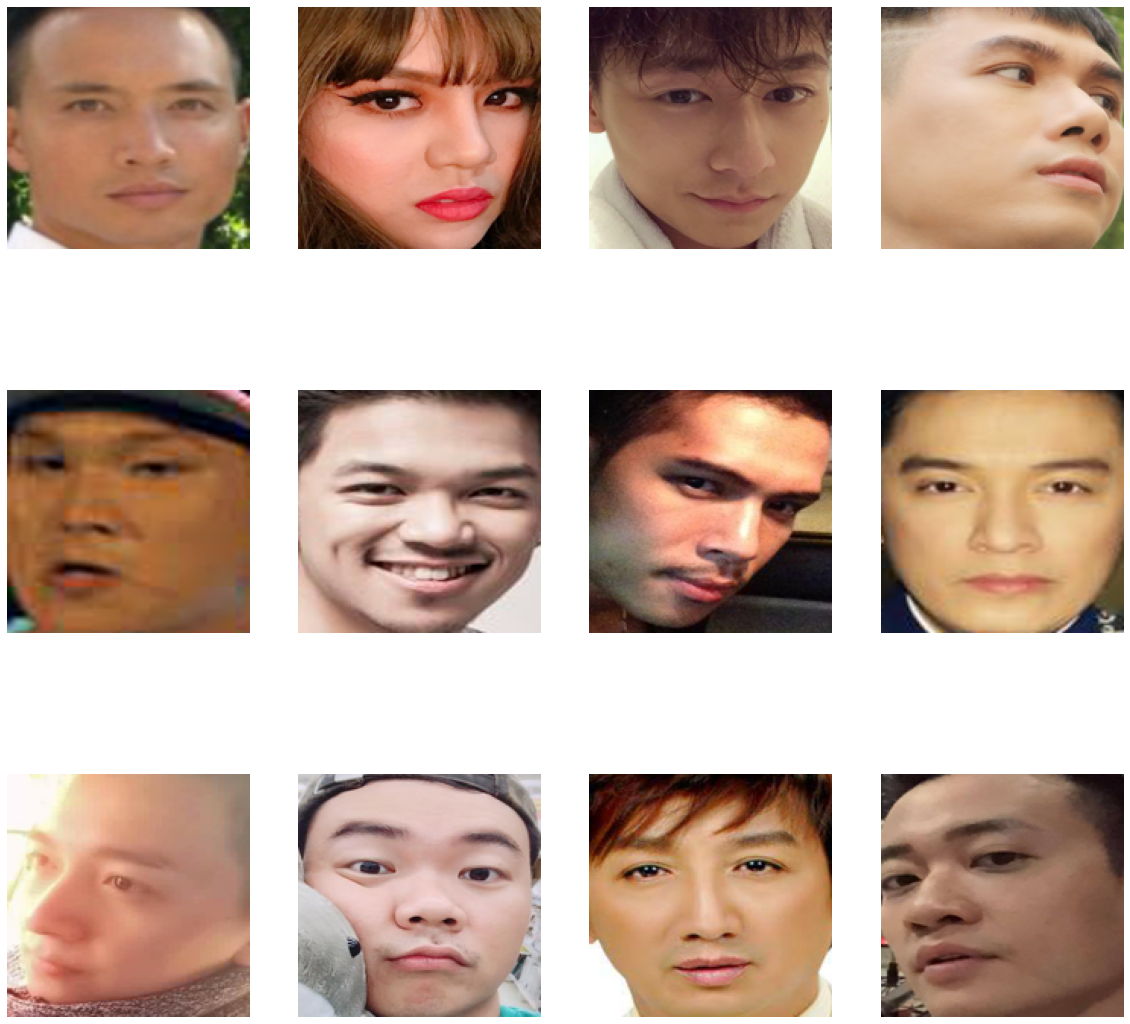

In [10]:
embedder = FaceNet()
plt.subplots(figsize=(20,20))
k = 1
image_list = get_list_files('/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male')
random_image_list = random.choices(image_list, k = 12)
for image in random_image_list:
    im = extract_face(image,embedder)
    plt.subplot(3,4,k)
    plt.imshow(im)
    plt.axis("off")
    k += 1

## Remove images that has more than two face

In [5]:
def check_only_one_face(directory_path):
    list_sub_dir = os.listdir(directory_path)
    # # create the detector, using default weights
    embedder = FaceNet()
    for sub_dir in list_sub_dir:
        count = 0
        dir_path = directory_path
        image_path = os.path.join(dir_path, sub_dir)
        print(image_path)
        list_file = os.listdir(image_path)
        with tqdm(total=len(list_file), file=sys.stdout) as pbar:

            for file_name in list_file:
                file_path = os.path.join(image_path, file_name)
                # load image from file
                try:
                  image = Image.open(file_path)
                except:
                  try:
                    os.remove(file_path)
                    count+=1
                    continue
                  except:
                    print('Can\'t not delete file:', file_path)
                    continue

                # convert to RGB, if needed
                image = image.convert('RGB')
                # convert to array
                pixels = np.asarray(image)
                # detect faces in the image
                results = embedder.extract(pixels)
                if len(results) != 1:
                    try:
                      os.remove(file_path)
                      count+=1
                    except:
                      print('Can\'t not delete file:', file_path)
                pbar.update(1)
        print('DELETED: ', count)

In [15]:
directory_path = '/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male'
check_only_one_face(directory_path)

/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Pham_Hong_Phuoc
100%|██████████| 214/214 [03:56<00:00,  1.10s/it]
DELETED:  0
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Ho_Trung_Dung
100%|██████████| 185/185 [03:11<00:00,  1.03s/it]
DELETED:  0
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Ho_Viet_Trung
100%|██████████| 219/219 [03:17<00:00,  1.11it/s]
DELETED:  0
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Ong_Cao_Thang
100%|██████████| 202/202 [03:38<00:00,  1.08s/it]
DELETED:  8
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Luong_The_Thanh
100%|██████████| 203/203 [05:02<00:00,  1.49s/it]
DELETED:  30
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Long_Nhat
100%|██████████| 256/256 [05:46<00:00,  1.35s/it]
DELETED:  48
/content/drive/Shareddrives/AI_Project/DatasetViet

In [7]:
directory_path = '/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male'
directory_path = '/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/mtcnn_dataset_182'
list_sub_dir = os.listdir(directory_path)
# create the detector, using default weights
count_list = []
for sub_dir in list_sub_dir:
    dir_path = directory_path
    image_path = os.path.join(dir_path, sub_dir)
    list_file = os.listdir(image_path)
    print(len(list_file), sub_dir)
    count_list+= list_file
print(len(count_list))

0 Thai_Vu
203 Mai_Tai_Phen
206 Khac_Viet
146 Justatee
186 Xuan_Bac
146 Nhan_Phuc_Vinh
171 Truong_Giang
213 Chi_Dan
164 Ong_Cao_Thang
190 Soobin_HoangSon
192 Thanh_Loc
200 Kenvin_Khanh
166 Trinh_Thang_Binh
188 Xuan_Nghi
163 Dam_Vinh_Hung
209 Nguyen_Khang
164 Trinh_Dinh_Quang
161 Noo_Phuoc_Thinh
180 Hamtet_Truong
143 Luong_The_Thanh
133 Quyen_Linh
147 Quang_Trung_Tran
208 Gin_Tuan_Kiet
134 Duong_Khac_Linh
166 Hoai_Linh
174 Khanh_Phuong
178 Long_Nhat
156 Dai_Nhan
169 BD_Tran
175 Bui_Anh_Tuan
163 OnlyC
190 Ho_Quang_Hieu
144 Ali_HoangDuong
177 Lam_Vinh_Hai
188 Chau_Khai_Phong
154 Tien_Luat
197 Phan_Anh
142 Hoai_Lam
167 Thanh_Bach
178 Nguyen_Tran_Trung_Quan
208 Dan_Truong
214 Minh_Luan
185 Truong_Nam_Thanh
173 Tran_Thanh
188 Isaac
170 Chi_Thien
144 Quy_Binh
234 Dan_Nguyen
183 Lou_Hoang
172 Phan_Manh_Quynh
184 Pham_Hong_Phuoc
157 Tung_Duong
157 Dao_Ba_Loc
177 Huy_Tran
176 Truc_Nhan
203 Don_Nguyen
155 Touliver
170 Lam_Hung
196 Quang_Ha
162 Huynh_Phuong
162 Minh_Du
208 Duy_Khanh
172 Tuan_Hung
1

In [ ]:
directory_path = '/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Female'
check_only_one_face(directory_path)

In [ ]:
directory_path = '/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Female'
list_sub_dir = os.listdir(directory_path)
# # create the detector, using default weights
for sub_dir in list_sub_dir:
    dir_path = directory_path
    image_path = os.path.join(dir_path, sub_dir)
    list_file = os.listdir(image_path)
    print len(list_file, sub_dir)

## Create test dataset

In [6]:
from shutil import move

def move_data_to_path(src, des, num=30):
    list_sub_dir = os.listdir(src)
    for sub_dir in list_sub_dir:
        print(sub_dir)
        dir_path = src
        dir_copy_path = des
        image_path = os.path.join(dir_path, sub_dir)
        image_copy_path = os.path.join(dir_copy_path, sub_dir)
        try:
            os.mkdir(image_copy_path)
        except:
            continue
        list_file = os.listdir(image_path)
        i = 1
        with tqdm(total=num, file=sys.stdout) as pbar:
            for file_name in list_file:
                file_path = os.path.join(image_path, file_name)
                file_copy_path = os.path.join(image_copy_path,file_name)
                move(file_path,file_copy_path)
                pbar.update(1)
                i+=1
                if i > num:
                  break
        
    

In [ ]:
# Create folder data test
test_path = '/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Female_Test' # Test folder path
os.mkdir(test_path)

In [ ]:
# Move data to test folder
src = '/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Female' # Data path
des = test_path
move_data_to_path(src, des)

In [9]:
# Create folder data test
test_path = '/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male_Test' # Test folder path
os.mkdir(test_path)

In [10]:
# Move data to test folder
src = '/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male' # Data path
des = test_path
move_data_to_path(src, des)

Ho_Trung_Dung
100%|██████████| 30/30 [00:00<00:00, 131.70it/s]
Ho_Viet_Trung
100%|██████████| 30/30 [00:00<00:00, 174.40it/s]
Ong_Cao_Thang
100%|██████████| 30/30 [00:00<00:00, 194.57it/s]
Luong_The_Thanh
100%|██████████| 30/30 [00:00<00:00, 326.29it/s]
Long_Nhat
100%|██████████| 30/30 [00:00<00:00, 174.08it/s]
Nguyen_Phi_Hung
100%|██████████| 30/30 [00:00<00:00, 188.00it/s]
TIM
100%|██████████| 30/30 [00:00<00:00, 185.20it/s]
Minh_Luan
100%|██████████| 30/30 [00:00<00:00, 174.29it/s]
Duong_Khac_Linh
100%|██████████| 30/30 [00:00<00:00, 191.46it/s]
Don_Nguyen
100%|██████████| 30/30 [00:00<00:00, 285.33it/s]
Lam_Hung
100%|██████████| 30/30 [00:00<00:00, 131.21it/s]
Chi_Thien
100%|██████████| 30/30 [00:00<00:00, 119.86it/s]
Duy_Khanh
100%|██████████| 30/30 [00:00<00:00, 120.57it/s]
Lou_Hoang
100%|██████████| 30/30 [00:00<00:00, 183.59it/s]
Ngo_Kien_Huy
100%|██████████| 30/30 [00:00<00:00, 171.22it/s]
Luong_Manh_Hai
100%|██████████| 30/30 [00:00<00:00, 272.00it/s]
Luong_Bang_Quang
100%|██

# **Training classification**

---



## Prepare dataset

In [7]:
# Gets a detection dict for each face
# in an image. Each one has the bounding box and
# face landmarks (from mtcnn.MTCNN) along with
# the embedding from FaceNet.
# return List of embedded images in folder
def get_embedding(dir, embedder):
    x = []
    for filename in listdir(dir):
        # set up file path
        filepath = os.path.join(dir,filename) 
        # load image from file
        image = Image.open(filepath)
        # convert to RGB, if needed
        image = image.convert('RGB')
        # convert to array
        pixels = np.asarray(image)
        # get embeddings for the faces in an image
        detections = embedder.extract(pixels, threshold=0.95)
        if(len(detections)<1):
            print('ERROR: Can\'t not detect face: ',filepath)
            continue
        if(len(detections)>1):
            print('ERROR: More than two face detected: ', filepath)
            continue
        x.append(detections[0]['embedding'])
    return x


In [8]:
# Get embedded list images and list labels in folder
def load_dataset(dir, embedder):
    x , y = [],[]
    for subdir in listdir(dir):
        subdir_path = dir+'/'+subdir
        
        data_embedding = get_embedding(subdir_path, embedder)
        for data in data_embedding:
            x.append(data)
            y.append(subdir)
    return x, y

In [13]:
# Create embedder tools with keras_facenet
embedder = FaceNet()

In [ ]:
# Create train dataset
dataset_train_path= '/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male' # Train data path
train_x, train_y = load_dataset(dataset_train_path, embedder)

In [ ]:
# Create test dataset
dataset_test_path= '/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male_Test' # Test data path
test_x, test_y = load_dataset(dataset_test_path, embedder)

## Training model classification using SVM method

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(train_y)
train_y = out_encoder.transform(train_y)
test_y = out_encoder.transform(test_y)

In [ ]:
# tranning model
model = SVC(kernel='linear', probability=True)
model.fit(train_x, train_y)
# score
score_train = model.score(train_x, train_y)
score_test = model.score(test_x, test_y)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

## Use model to recognize faces in images (test for show image and probrability)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# read image from file path
image = cv2.imread('') # Image test path
# convert to RGB, if needed
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to array
pixels = asarray(image)
# create the detector, using default weights
detections = embedder.extract(pixels)

# loop through each face in detections
for detect in detections:
    # get embedded image
    embedded_img = detect['embedding']
    # get coordinates (x,y) and weight, height (w, h) of the bounding box
    x,y,w,h= detect['box']

    # expand dimension for feeding data to the model
    samples = np.expand_dims(embedded_img, axis=0)

    # get predict from model
    yhat_class = model.predict(samples)
    yhat_prob = model.predict_proba(samples)

    # get label name
    class_index = yhat_class[0]
    predict_names = out_encoder.inverse_transform(yhat_class)[0]

    # get probability
    class_probability = round(yhat_prob[0,class_index] * 100)
    

    # draw bounding box with label in the image
    start_point = (x,y)
    end_point = (x+w,y+h)  
    # green color in BGR
    color = (0, 255, 0)
    # thickness
    thickness = 3
    # Draw a rectangle with green line borders of thickness of 3 px
    cv2.rectangle(image, start_point, end_point, color, thickness)

    # Put label name if probability >50% and 'Unknown'' if <= 50%
    if class_probability>50:
        cv2.putText(image, "{}:{:.0f}%".format(predict_names,round(class_probability)), (start_point),
          cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    else:
        cv2.putText(image, "Unknown".format(predict_names,round(class_probability)), (start_point),
          cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)

#show image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (900,600))
cv2_imshow(image)

# **Try to increase accuracy by training the model FaceNet using triplet loss**

---



## **Using https://github.com/davidsandberg/facenet for create train dataset** 

Code for implementing facenet by David Sandberg

### Install tensorflow version 1.* and scipy version 1.1.0

In [9]:
!pip install -U --pre tensorflow=="1.*"

     |████████████████████████████████| 110.5MB 84kB/s 
     |████████████████████████████████| 512kB 34.0MB/s 
     |████████████████████████████████| 20.1MB 1.3MB/s 
     |████████████████████████████████| 3.8MB 42.5MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=5cbf283fad34ad7106d4c9ad1f6d63b0413c0ca86d75a03d27d8002c92dcc6de
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0

In [10]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 173kB/s 
ERROR: pymc3 3.11.2 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


### Clone FaceNet model and set up enviroment

In [1]:
!git clone https://github.com/davidsandberg/facenet.git

Cloning into 'facenet'...
remote: Enumerating objects: 3149, done.
remote: Counting objects: 100% (230/230), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 3149 (delta 220), reused 211 (delta 211), pack-reused 2919
Receiving objects: 100% (3149/3149), 2.92 MiB | 24.91 MiB/s, done.
Resolving deltas: 100% (2238/2238), done.


In [2]:
%set_env PYTHONPATH=/content/facenet/src:/env/python

env: PYTHONPATH=/content/facenet/src:/env/python


In [3]:
%%bash
cd drive
cd MyDrive
cd Dataset
mkdir mtcnnpy_182_dataset

mkdir: cannot create directory ‘mtcnnpy_182_dataset’: File exists


### Create dataset with mtcnn

In [ ]:
# Code for fix bug
# replace line 85 with this for fix code - detect_face.py
# # save np.load
# np_load_old = np.load

# # modify the default parameters of np.load
# np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# # call load_data with allow_pickle implicitly set to true
# data_dict = np.load(data_path, encoding='latin1').item() #pylint: disable=no-member
# # restore np.load for future normal usage
# np.load = np_load_old

!python facenet/src/align/align_dataset_mtcnn.py /content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male /content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/mtcnn_dataset_182_full --image_size 182 --margin 44

Streaming output truncated to the last 5000 lines.
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Quyen_Linh/Quyen_Linh (33).jpg
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Quyen_Linh/Quyen_Linh (28).jpg
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Quyen_Linh/Quyen_Linh (35).jpg
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Quyen_Linh/Quyen_Linh (29).jpg
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Quyen_Linh/Quyen_Linh (36).jpg
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Quyen_Linh/Quyen_Linh (39).jpg
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Quyen_Linh/Quyen_Linh (38).jpg
/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/VN_Male/Quyen_Linh/Quyen_Linh (32).jpg
/content/drive/Shareddrives/AI_Project/Datase

In [7]:
# !rm -rf /content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/mtcnn_dataset_182_full

### Training model tensorflow 1 with tripletloss (optional)

In [ ]:
# Code for fix bug
# image = tf.to_float(image) # put code between line 118, and 120 in train_tripletloss.py

!python /facenet/src/train_tripletloss.py --logs_base_dir ~/logs/facenet/ --models_base_dir /content/20180402-114759 --data_dir /content/train_dataset/mtcnnpy_182_dataset --image_size 160 --model_def models.inception_resnet_v1 --optimizer RMSPROP --learning_rate 0.01 --weight_decay 1e-4 --max_nrof_epochs 500 --people_per_batch 45 --images_per_person 40

## **Training keras_facenet model**

### Install tensorflow version 2.*

In [ ]:
!pip install -U --pre tensorflow=="2.*"

### Training model tensorflow 2 with tripletloss

### Create model, dataset

In [ ]:
# Create model FaceNet for training
model = FaceNet()

In [ ]:
# Print model architecture
model.model.summary()

In [ ]:
# Create data from directory for training
def get_data_train(src):
    x , y = [],[]
    list_dir = os.listdir(src)
    for sub_dir in list_dir:
        list_image_path = os.path.join(src,sub_dir)
        list_image = os.listdir(list_image_path)

        with tqdm(total=len(list_image), file=sys.stdout) as pbar:
            for file_path in list_image:
                image_path = os.path.join(list_image_path, file_path)
                image = Image.open(image_path)
                # convert to RGB, if needed
                image = image.convert('RGB')
                # convert to array
                pixels = np.asarray(image)
                x.append(pixels)
                y.append(sub_dir)
                pbar.update(1)
    return np.array(x),y

In [ ]:
# Create dataset for training
src = '/content/drive/MyDrive/Dataset/mtcnnpy_182_dataset'
x_train_data, y_train_data = get_data_train(src)

In [ ]:
print(train.shape, len(train_y))

(4699, 182, 182, 3) 4699


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_data, y_train_data, test_size=0.2)

### Install tensorflow-addons for using Triplet loss

In [ ]:
!pip install -q -U tensorflow-addons

In [ ]:
import tensorflow_addons as tfa

model.model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tfa.losses.TripletSemiHardLoss())

### Training model facenet

In [ ]:
mcp = tf.keras.callbacks.ModelCheckpoint("/content/drive/Shareddrives/AI_Project/DatasetVietNam/DataVietNam/VietNam/Train_Checkpoint/my_model.h5", monitor="val_accuracy",
                       save_weights_only=True)

In [ ]:
# Create data shuffle with batch size
gen_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).repeat().shuffle(1024).batch(8)
gen_train

<BatchDataset shapes: ((None, 182, 182, 3), (None,)), types: (tf.uint8, tf.string)>

In [ ]:
# Training model
model.model.fit(gen_train, validation_data=(x_valid, y_valid), callbacks=[mcp], epochs=1000)

# **Retraining classification**

---



## Prepare dataset

In [ ]:
# Create embedder tools with keras_facenet
embedder = FaceNet()
embedder.model.load_weights()

In [ ]:
# Create train dataset
dataset_train_path= '' # Train data path
train_x, train_y = load_dataset(dataset_train_path, embedder)

In [ ]:
# Create test dataset
dataset_test_path= '' # Test data path
test_x, test_y = load_dataset(dataset_test_path, embedder)

## Training model classification using SVM method

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(train_y)
train_y = out_encoder.transform(train_y)
test_y = out_encoder.transform(test_y)

In [ ]:
# tranning model
model = SVC(kernel='linear', probability=True)
model.fit(train_x, train_y)
# score
score_train = model.score(train_x, train_y)
score_test = model.score(test_x, test_y)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

## Use model to recognize faces in images (test for show image and probrability)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# read image from file path
image = cv2.imread('') # Image test path
# convert to RGB, if needed
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to array
pixels = asarray(image)
# create the detector, using default weights
detections = embedder.extract(pixels)

# loop through each face in detections
for detect in detections:
    # get embedded image
    embedded_img = detect['embedding']
    # get coordinates (x,y) and weight, height (w, h) of the bounding box
    x,y,w,h= detect['box']

    # expand dimension for feeding data to the model
    samples = np.expand_dims(embedded_img, axis=0)

    # get predict from model
    yhat_class = model.predict(samples)
    yhat_prob = model.predict_proba(samples)

    # get label name
    class_index = yhat_class[0]
    predict_names = out_encoder.inverse_transform(yhat_class)[0]

    # get probability
    class_probability = round(yhat_prob[0,class_index] * 100)
    

    # draw bounding box with label in the image
    start_point = (x,y)
    end_point = (x+w,y+h)  
    # green color in BGR
    color = (0, 255, 0)
    # thickness
    thickness = 3
    # Draw a rectangle with green line borders of thickness of 3 px
    cv2.rectangle(image, start_point, end_point, color, thickness)

    # Put label name if probability >50% and 'Unknown'' if <= 50%
    if class_probability>50:
        cv2.putText(image, "{}:{:.0f}%".format(predict_names,round(class_probability)), (start_point),
          cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
    else:
        cv2.putText(image, "Unknown".format(predict_names,round(class_probability)), (start_point),
          cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)

#show image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (900,600))
cv2_imshow(image)